# Intro to NBA Data with nba_api pt 2
## Let's learn about the capabilities of the `players` module


In [11]:

from nba_api.stats.static import players
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#we can get a player by full name, first name, player_id, and last name:
lebron = players.find_players_by_full_name('Lebron James')[0]

#all Jameses in nba history, and so on
jameses = players.find_players_by_last_name('James')[0]
#remember we need to call the first element 0 to directly access the dictionary

Now let's use stats with these player and team_ids
I tried this with nba_api.stats.endpoints module playergamelogs, but it didn't work. Drop the s

Since something is wrong, let's try the playergamelog module instead

In [12]:
from nba_api.stats.endpoints import playergamelog
#call the class PlayerGameLog from its module, use id key from lebron player dictionary
lebron_log = playergamelog.PlayerGameLog(player_id = lebron['id'],season = 'all')
#promising. Now use get_data_frames()[0] again
lebron_df = lebron_log.get_data_frames()[0]
#boom, we got lebron's entire career in a data frame of game logs
lebron_df.sample(10)


,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
1220,22005,2544,0020500946,"MAR 14, 2006",CLE @ DAL,L,45,14,27,0.519,...,11,12,5,0,2,4,1,36,-8,0
612,22013,2544,0021301067,"MAR 26, 2014",MIA @ IND,L,43,11,19,0.579,...,8,8,5,0,0,6,3,38,2,1
606,22013,2544,0021301149,"APR 06, 2014",MIA vs. NYK,W,43,13,22,0.591,...,5,5,6,1,0,5,0,38,2,1
955,22009,2544,0020900235,"NOV 28, 2009",CLE vs. DAL,W,36,10,20,0.500,...,5,5,12,0,0,1,2,25,8,0
411,22016,2544,0021600759,"FEB 04, 2017",CLE @ NYK,W,40,12,20,0.600,...,5,5,10,0,0,5,1,32,11,1
564,22014,2544,0021400700,"JAN 30, 2015",CLE vs. SAC,W,33,7,16,0.438,...,3,3,7,4,2,6,1,19,13,1
588,22014,2544,0021400211,"NOV 26, 2014",CLE vs. WAS,W,36,7,14,0.500,...,9,10,8,3,0,4,3,29,24,1
845,22010,2544,0021000792,"FEB 11, 2011",MIA @ DET,W,35,7,17,0.412,...,8,8,10,4,0,3,0,16,15,0
653,22013,2544,0021300387,"DEC 20, 2013",MIA vs. SAC,W,31,8,11,0.727,...,4,6,8,1,1,1,1,18,14,1
271,22018,2544,0021800439,"DEC 16, 2018",LAL @ WAS,L,32,5,16,0.313,...,6,6,3,0,1,4,0,13,-21,1


Next, let's use this data frame as an opportunity to mess around with pandas. Then we'll explore other modules relating to players

In [13]:
#starting simple, high in points:
print('Lebron\'s career high in points:',max(lebron_df['PTS']))
#now let's sort the data by points and return the top 10 scoring games
lebron_df.sort_values(by = 'PTS',ascending = False).head(10)
#now a simple scoring average... (spoiler, it's almost exactly 27)
print('points avg:',lebron_df['PTS'].mean())
#let's see how true it is that Lebron is good for 27,7 and 7 (PTS, REB, AST)
print('rebounds avg:',lebron_df['REB'].mean())
print('assists avg:',lebron_df['AST'].mean())
#Okay. Surely he must have a game with exactly 27,7 and 7, right? RIGHT? R I G H T ? ? ? 
print('Lebron games with 27,7 and 7:',lebron_df[(lebron_df['PTS'] == 27) & (lebron_df['AST'] == 7) & (lebron_df['REB'] == 7)])
#Empty Data Frame!!!


Lebron's career high in points: 61
points avg: 27.170360110803323
rebounds avg: 7.5069252077562325
assists avg: 7.323407202216067
Lebron games with 27,7 and 7: Empty DataFrame
Columns: [SEASON_ID, Player_ID, Game_ID, GAME_DATE, MATCHUP, WL, MIN, FGM, FGA, FG_PCT, FG3M, FG3A, FG3_PCT, FTM, FTA, FT_PCT, OREB, DREB, REB, AST, STL, BLK, TOV, PF, PTS, PLUS_MINUS, VIDEO_AVAILABLE]
Index: []

[0 rows x 27 columns]


### Wow, so lebron does not have a single game with his career average metrics in PTS, REB and AST
Let's delve a little deeper into some of these stats. Beyond those numbers, we also have some shooting stats... 

Let's look at these field goal attempts, 3 point attempts and free throw attempts.

In [14]:
#let's grab the totals for fga, fgm, and divide fgm by fga to get a field goal percentage
#first field goal percentage
lebron_fg_percentage = round((lebron_df["FGM"].sum()/lebron_df["FGA"].sum())*100,2)
print(f'Lebron James\' career FG% is: {lebron_fg_percentage} percent')


Lebron James' career FG% is: 50.53 percent


In [15]:
#now 3 point percentage, we'll use a different syntax just to demonstrate
lebron_3fg_percentage = round((lebron_df.FG3M.sum()/lebron_df.FG3A.sum())*100,2)
print(f'Lebron James\' career 3-point% is: {lebron_3fg_percentage} percent')


Lebron James' career 3-point% is: 34.57 percent


In [16]:
#And finally free throw percentage:
#now 3 point percentage, we'll use a different syntax just to demonstrate
lebron_ft_percentage = round((lebron_df.FTM.sum()/lebron_df.FTA.sum())*100,2)
print(f'Lebron James\' career free-throw% is: {lebron_ft_percentage} percent')

Lebron James' career free-throw% is: 73.5 percent


Now let's break these down by season using `SEASON_ID` and find his percentages for each season.


In [17]:
#let's create a FGPercentage column for our dataframe
(lebron_df.groupby('SEASON_ID') #group by season
    .agg(({'FGA':'sum','FGM':'sum'})) # aggregate sums of FGM and FGA
    .assign(FGPercentage = lambda x:(x['FGM'] / x['FGA'])*100) #assign new column based on division of FGM by FGA *100 (for percentage)
    .round(2) #round this column to 2 decimals
    [['FGPercentage']]
    )


,FGPercentage
SEASON_ID,
22003,41.69
22004,47.21
22005,48.00
22006,47.62
22007,48.36
22008,48.92
22009,50.26
22010,51.04
22011,53.12


You can imagine how the same could be done for other percentages like FG% and 3PT%. 

How about the statistic of True Shooting Percentage? Let's calculate his season by season TS%, which attempts to calculate the efficiency of a player's scoring attempts based on the relative value of 2 point shots, free throws, and 3pt shots. Traditional FG% as calculated above does not account for free throw attempts in terms of efficiency, and doesn't account for the fact that 3 pointers are... worth 3 points. 

The formula is: 


# <sup>.5PTS</sup>/<sub>FGA + .475 FTA</sub>

In [18]:
lebron_df.rename(columns = {'SEASON_ID':'SEASON'},inplace = True) #rename column for season_id to season
lebron_df['SEASON'] = lebron_df['SEASON'].str.slice(1) #get rid of first digit in that string


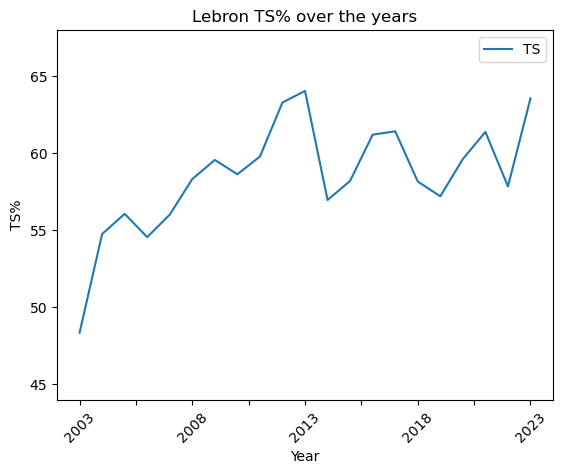

In [20]:

(lebron_df.groupby('SEASON') #group by season
    .agg(({'FGA':'sum','PTS':'sum','FTA':'sum'})) # aggregate sums for our variables of interest
    .assign(TS = lambda x:(.5*x['PTS'])/(x['FGA']+ (.475*x['FTA']))*100) #create TS column for TS%
    .round(2) #round this column to 2
    [['TS']] # Select only the relevant column (and SEASON, as it's our groups)
    .plot()  
    )
#now make changes using matplotlib.pyplot
plt.title("Lebron TS% over the years")
plt.xlabel("Year")
plt.ylabel("TS%")
plt.xticks(rotation = 45) #rotate x ticks 45˚
plt.ylim(top = 68,bottom = 44)
plt.show()


I'd also like to look at other players - see if we can pull specific game logs from the players module, using the playergamelog class, based on statistical values in the data frame. We'll have to make a general call (not using a single player_id parameter) to the class, then specify stats. 

That will be worked on in part 3 of this introduction to nba_api. 